# Estudo de caso com o framework MathFeature
- https://bonidia.github.io/MathFeature/

Utilização por linha de comando:
- git clone https://github.com/Bonidia/MathFeature.git MathFeature
- cd MathFeature
- pip3 install -r requirements.txt
- apt-get -y install python3-igraph

## Baixando sequências de repositórios públicos
- GENCODE: https://www.gencodegenes.org/
- PHYTOZOME: https://phytozome-next.jgi.doe.gov/
- GREENC: http://greenc.sequentiabiotech.com/wiki/Main_Page

## Etapas de pré-processamento

- Contagem da quantidade de sequências;
- Amostragem;
- Remoção de redundância;
- Eliminação de ruídos.
- Extração de características;
- Composição da base de dados

## Modelo: Arabidopsis thaliana
Base (lncRNA) GREENC: http://greenc.sequentiabiotech.com/wiki/Species:Arabidopsis_thaliana

Base (mRNA) Phytozome: https://data.jgi.doe.gov/refine-download/phytozome?genome_id=167

#### Divisão da base em treino e teste

In [1]:
#Base lncRNA e mRNA
import os 
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

def split(finput, test_rate):
    dataset = pandas.read_csv(finput)
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_rate)
    train = pandas.concat([X_train, y_train], axis=1)
    test = pandas.concat([X_test, y_test], axis=1)
    
    trainData = os.path.splitext(finput)[0]+"_train"+os.path.splitext(finput)[1]
    testData = os.path.splitext(finput)[0]+"_test"+os.path.splitext(finput)[1]
    train.to_csv(trainData, index=False)
    test.to_csv(testData, index=False)    
    return                             


# Aplica a divisão treino e teste nas bases mRNA e lncRNA

split('bases/mRNA.csv',0.3)
split('bases/lncRNA.csv',0.3)

# carrega a base de dados treino lncRNA e mRNA
lncRNA_data = pandas.read_csv('bases/lncRNA_train.csv')
mRNA_data = pandas.read_csv('bases/mRNA_train.csv')
dadosTreino = pandas.concat([lncRNA_data,mRNA_data])

In [2]:
dadosTreino.columns

Index(['nameseq', 'maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'fickett_score-ORF',
       'fickett_score-full-sequence', 'A', 'C', 'G', 'T', 'AA', 'AC', 'AG',
       'AT', 'CA', 'CC', 'CG', 'CT', 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG',
       'TT', 'AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA',
       'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG',
       'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA',
       'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG',
       'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA',
       'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG',
       'TGT', 'TTA', 'TTC', 'TTG', 'TTT', 'label'],
      dtype='object')

In [3]:
dadosTreino

,nameseq,maximum_ORF_length,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,label
0,lcl|Athaliana_AT1G17255.1,192,6,53.220612,60.937500,0.873364,51.851852,26.666667,5.170413,41.750088,...,0.020847,0.027036,0.013355,0.017915,0.019218,0.013029,0.021498,0.029642,0.024430,lncRNA
1,lcl|Athaliana_AT3G29572.1,186,6,44.754750,50.888889,0.879460,48.148148,16.666667,8.910446,31.011256,...,0.014169,0.028337,0.011931,0.014169,0.021626,0.035048,0.014169,0.030574,0.062640,lncRNA
2,lcl|Athaliana_AT4G13615.1,216,15,75.367433,77.500000,0.972483,54.166667,29.629630,8.359375,40.980431,...,0.016484,0.041209,0.027473,0.030220,0.021978,0.010989,0.008242,0.038462,0.035714,lncRNA
3,lcl|Athaliana_AT5G28824.1,141,12,49.752990,64.200000,0.774969,41.666667,16.666667,10.413666,29.000000,...,0.040222,0.019417,0.005548,0.006935,0.015257,0.015257,0.042996,0.015257,0.040222,lncRNA
4,lcl|Athaliana_AT4G04296.1,165,9,53.249104,73.058824,0.728852,41.666667,22.222222,5.147737,32.899476,...,0.013475,0.012057,0.012057,0.019858,0.012766,0.021277,0.015603,0.026241,0.031915,lncRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,AT1G01770.1|PACid:19649858,1899,6,380.178930,123.260870,3.084344,59.259259,27.777778,7.354491,41.494641,...,0.026885,0.020032,0.016869,0.034265,0.021086,0.014760,0.021086,0.023195,0.014760,mRNA
2101,AT4G00820.1|PACid:19645036,1605,6,486.812079,238.000000,2.045429,49.717514,33.333333,4.415460,42.634981,...,0.020586,0.013100,0.011853,0.015596,0.008734,0.014348,0.017467,0.012477,0.010605,mRNA
2102,AT3G45020.1|PACid:19662337,402,15,180.349660,147.000000,1.226868,58.333333,33.333333,10.241555,45.232172,...,0.012500,0.040000,0.007500,0.015000,0.015000,0.017500,0.012500,0.010000,0.017500,mRNA
2103,AT5G51820.1|PACid:19668976,1872,6,448.423193,212.200000,2.113210,50.505051,33.333333,5.327227,40.697282,...,0.017647,0.022460,0.014439,0.028342,0.018717,0.015508,0.025668,0.024599,0.034225,mRNA


In [4]:
## Remove column nameseq
dadosTreino.drop(columns='nameseq', inplace=True)

## Sem normalização dos dados

In [5]:
#Divide a base entre os previsores e classe
colunas = dadosTreino.columns.drop('label')

# Gera os previsores e classe (X e y)
X = dadosTreino[colunas].values
y = dadosTreino['label']

## Transform categorical in binary class values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Gera os dados de teste
# carrega a base de dados teste lncRNA e mRNA
lncRNA_test = pandas.read_csv('bases/lncRNA_test.csv')
mRNA_test = pandas.read_csv('bases/mRNA_test.csv')
dados = pandas.concat([lncRNA_test,mRNA_test])

dadosTeste = dados.columns.drop('label')
X_teste = dados[dadosTeste].values

##Remove categorical column nameseq
import numpy as np
X_teste = np.delete(X_teste, 0, axis=1)

##Label Encoder Tranform
y_teste = dados['label']
y_teste = le.fit_transform(y_teste)

In [6]:
# instancia um DecisionTreeClassifier
clf = DecisionTreeClassifier()
# treina o knn
clf.fit(X, y)

y_pred = clf.predict(X_teste)
#print(y_pred)

 # gerar score baseado na acurácia
acuracidade = round(accuracy_score(y_teste,y_pred)*100,2)
print(acuracidade)

92.8


## Com normalização dos dados

In [7]:
## Transform categorical in binary class values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dadosTreino["label"] = le.fit_transform(dadosTreino["label"])

In [8]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
cols = dadosTreino.iloc[:, 0:11].columns
dadosTreino[cols] = pandas.DataFrame(scaler.fit_transform(dadosTreino.iloc[:, 0:11]), columns=dadosTreino.iloc[:, 0:11].columns)

In [9]:
dadosTreino

,maximum_ORF_length,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,label
0,0.012551,0.006536,0.043433,0.066381,0.111120,0.674074,0.417143,0.257756,0.602016,0.219015,...,0.020847,0.027036,0.013355,0.017915,0.019218,0.013029,0.021498,0.029642,0.024430,0
1,0.012159,0.006536,0.036524,0.055435,0.111895,0.625926,0.260714,0.444205,0.447167,0.508143,...,0.014169,0.028337,0.011931,0.014169,0.021626,0.035048,0.014169,0.030574,0.062640,0
2,0.014120,0.016340,0.061507,0.084423,0.123731,0.704167,0.463492,0.416733,0.590918,0.360748,...,0.016484,0.041209,0.027473,0.030220,0.021978,0.010989,0.008242,0.038462,0.035714,0
3,0.009217,0.013072,0.040603,0.069935,0.098601,0.541667,0.260714,0.519144,0.418166,0.635056,...,0.040222,0.019417,0.005548,0.006935,0.015257,0.015257,0.042996,0.015257,0.040222,0
4,0.010786,0.009804,0.043457,0.079585,0.092733,0.541667,0.347619,0.256626,0.474395,0.276716,...,0.013475,0.012057,0.012057,0.019858,0.012766,0.021277,0.015603,0.026241,0.031915,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,0.013532,0.026144,0.042781,0.079521,0.091365,0.693333,0.423661,0.355223,0.584488,0.310884,...,0.026885,0.020032,0.016869,0.034265,0.021086,0.014760,0.021086,0.023195,0.014760,1
2101,0.014317,0.039216,0.049190,0.112979,0.073942,0.787075,0.434524,0.595516,0.640997,0.475237,...,0.020586,0.013100,0.011853,0.015596,0.008734,0.014348,0.017467,0.012477,0.010605,1
2102,0.012355,0.006536,0.037155,0.061200,0.103104,0.619048,0.086905,0.382216,0.436269,0.448154,...,0.012500,0.040000,0.007500,0.015000,0.015000,0.017500,0.012500,0.010000,0.017500,1
2103,0.017454,0.045752,0.076339,0.181917,0.071266,0.588095,0.679615,0.039041,0.636544,0.031374,...,0.017647,0.022460,0.014439,0.028342,0.018717,0.015508,0.025668,0.024599,0.034225,1


In [10]:
#Divide a base entre os previsores e classe
colunas = dadosTreino.columns.drop('label')

# Gera os previsores e classe (X e y)
X = dadosTreino[colunas].values
y = dadosTreino['label']

## Gera os dados de teste
# carrega a base de dados teste lncRNA e mRNA
lncRNA_test = pandas.read_csv('bases/lncRNA_test.csv')
mRNA_test = pandas.read_csv('bases/mRNA_test.csv')
dados = pandas.concat([lncRNA_test,mRNA_test])

dadosTeste = dados.columns.drop('label')
X_teste = dados[dadosTeste].values

##Remove categorical column nameseq
import numpy as np
X_teste = np.delete(X_teste, 0, axis=1)

##Label Encoder Tranform
y_teste = dados['label']
y_teste = le.fit_transform(y_teste)

#### Atributos utilizados: 

In [11]:
# Exibe a quantidade de atributos
print("Columns size >>> %d"%len(colunas))

# Exibe o nome dos atributos
print(dadosTreino.columns)

Columns size >>> 96
Index(['maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'fickett_score-ORF',
       'fickett_score-full-sequence', 'A', 'C', 'G', 'T', 'AA', 'AC', 'AG',
       'AT', 'CA', 'CC', 'CG', 'CT', 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG',
       'TT', 'AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA',
       'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG',
       'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA',
       'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG',
       'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA',
       'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG',
       'TGT', 'TTA', 'TTC', 'TTG', 'TTT', 'label'],
      dtype='object')


In [12]:
print(X.shape, y.shape, X_teste.shape, y_teste.shape)

(4209, 96) (4209,) (1805, 96) (1805,)


#### Aplica o modelo de predição com Decision Tree

In [13]:
# instancia um DecisionTreeClassifier
clf = DecisionTreeClassifier()
# treina o DT
clf.fit(X, y)

y_pred = clf.predict(X_teste)
#print(y_pred)

 # gerar score baseado na acurácia
acuracidade = round(accuracy_score(y_teste,y_pred)*100,2)
print(acuracidade)

57.34


## Seleção de características com Wrapper e Recursive feature elimination
#### Detalhes: https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

In [12]:
print(X.shape)

(4209, 96)


In [14]:
from sklearn.feature_selection import RFE

# instancia um DecisionTreeClassifier
clf = DecisionTreeClassifier()
selector = RFE(clf, step=1)
selector = selector.fit(X, y)

#Armazena a nova dimensão do vetor de características
features = selector.fit_transform(X,y)

# instancia um DecisionTreeClassifier
y_pred = selector.predict(X_teste)

print(selector.ranking_)
print(selector.get_support(indices=True))

 # gerar score baseado na acurácia
acuracidade = round(accuracy_score(y_teste,y_pred)*100,2)
print(acuracidade)



[ 1 23 13  1  1 26  1 25  1  1  1  1 28 31  5  1 40  1  1  1 46 41  1  1
 44 27  1 35  1 49  1 36  4 48 42  1  1  1  1  3  1  1  9  1 16 11  1  1
  1 47 37 24 43 33 34  1  1 39  1  1  1  1 14  2  1  1 32 22 10 12  1  1
  1 19 29 15  1  1 21 18  1  1 20  6  1 45  7 17  8  1  1 30  1  1 38  1]
[ 0  3  4  6  8  9 10 11 15 17 18 19 22 23 26 28 30 35 36 37 38 40 41 43
 46 47 48 55 56 58 59 60 61 64 65 70 71 72 76 77 80 81 84 89 90 92 93 95]
58.45


In [15]:
print(features.shape)

(4209, 48)


### Obtendo o nome dos 48 atributos

In [16]:
temp = pandas.Series(selector.support_,index = colunas)
wrapperApproach = temp[temp==True].index
print(wrapperApproach)

Index(['maximum_ORF_length', 'average_ORF_length', 'cv_ORF_length',
       'minimum_GC_content_ORF', 'average_GC_content_ORF', 'cv_GC_content_ORF',
       'fickett_score-ORF', 'fickett_score-full-sequence', 'T', 'AC', 'AG',
       'AT', 'CG', 'CT', 'GG', 'TA', 'TG', 'AAT', 'ACA', 'ACC', 'ACG', 'AGA',
       'AGC', 'AGT', 'ATG', 'ATT', 'CAA', 'CCT', 'CGA', 'CGG', 'CGT', 'CTA',
       'CTC', 'GAA', 'GAC', 'GCG', 'GCT', 'GGA', 'GTA', 'GTC', 'TAA', 'TAC',
       'TCA', 'TGC', 'TGG', 'TTA', 'TTC', 'TTT'],
      dtype='object')


In [17]:
# Deixa no formato list
featuresList = wrapperApproach.tolist()

In [18]:
print(featuresList)

['maximum_ORF_length', 'average_ORF_length', 'cv_ORF_length', 'minimum_GC_content_ORF', 'average_GC_content_ORF', 'cv_GC_content_ORF', 'fickett_score-ORF', 'fickett_score-full-sequence', 'T', 'AC', 'AG', 'AT', 'CG', 'CT', 'GG', 'TA', 'TG', 'AAT', 'ACA', 'ACC', 'ACG', 'AGA', 'AGC', 'AGT', 'ATG', 'ATT', 'CAA', 'CCT', 'CGA', 'CGG', 'CGT', 'CTA', 'CTC', 'GAA', 'GAC', 'GCG', 'GCT', 'GGA', 'GTA', 'GTC', 'TAA', 'TAC', 'TCA', 'TGC', 'TGG', 'TTA', 'TTC', 'TTT']


## Análise por Feature Importance (Método Wrapper)

Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

Feature maximum_ORF_length - score 0.00530
Feature average_ORF_length - score 0.00810
Feature cv_ORF_length - score 0.00762
Feature minimum_GC_content_ORF - score 0.00993
Feature average_GC_content_ORF - score 0.04117
Feature cv_GC_content_ORF - score 0.00696
Feature fickett_score-ORF - score 0.07971
Feature fickett_score-full-sequence - score 0.31026
Feature T - score 0.00561
Feature AC - score 0.00176
Feature AG - score 0.00760
Feature AT - score 0.02073
Feature CG - score 0.01448
Feature CT - score 0.01075
Feature GG - score 0.02027
Feature TA - score 0.02761
Feature TG - score 0.00950
Feature AAT - score 0.00668
Feature ACA - score 0.00657
Feature ACC - score 0.00701
Feature ACG - score 0.00632
Feature AGA - score 0.00441
Feature AGC - score 0.00773
Feature AGT - score 0.00814
Feature ATG - score 0.00591
Feature ATT - score 0.00815
Feature CAA - score 0.00632
Feature CCT - score 0.00882
Feature CGA - score 0.00559
Feature CGG - score 0.00668
Feature CGT - score 0.01191
Feature CTA 

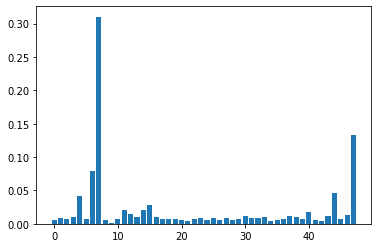

In [19]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(features, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature %s - score %.5f' % (featuresList[i], v) )
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature maximum_ORF_length - score 0.00778
Feature average_ORF_length - score 0.01116
Feature cv_ORF_length - score 0.00924
Feature minimum_GC_content_ORF - score 0.01227
Feature average_GC_content_ORF - score 0.02421
Feature cv_GC_content_ORF - score 0.01059
Feature fickett_score-ORF - score 0.02550
Feature fickett_score-full-sequence - score 0.13728
Feature T - score 0.04265
Feature AC - score 0.01069
Feature AG - score 0.01188
Feature AT - score 0.01433
Feature CG - score 0.01213
Feature CT - score 0.01054
Feature GG - score 0.05039
Feature TA - score 0.03487
Feature TG - score 0.01059
Feature AAT - score 0.02988
Feature ACA - score 0.01107
Feature ACC - score 0.01030
Feature ACG - score 0.01489
Feature AGA - score 0.01004
Feature AGC - score 0.01117
Feature AGT - score 0.01055
Feature ATG - score 0.01261
Feature ATT - score 0.02580
Feature CAA - score 0.01047
Feature CCT - score 0.01069
Feature CGA - score 0.00948
Feature CGG - score 0.01005
Feature CGT - score 0.01064
Feature CTA 

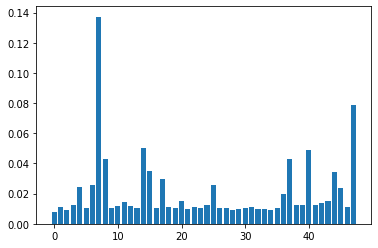

In [20]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(features, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
     print('Feature %s - score %.5f' % (featuresList[i], v) )
     #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Seleção de atributos abordagem filtro

In [21]:
#Feature selection with Mutual Information 
import numpy
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

#selector = SelectKBest(score_func=chi2, k=42)
selector = SelectKBest(score_func=mutual_info_classif, k=48)
#selector = SelectKBest(score_func=f_classif, k=42)

selector.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
print(cols)

[11 14 15 16 18 19 22 24 25 26 28 31 32 35 38 41 42 44 47 50 51 56 60 61
 62 64 65 66 68 69 70 71 72 73 74 75 76 77 80 81 82 83 86 87 90 91 92 95]


In [22]:
# to remove the rest of the features:
X = selector.transform(X)
X_teste = selector.transform(X_teste)

In [23]:
# instancia um DecisionTreeClassifier
clf = DecisionTreeClassifier()
# treina o knn
clf.fit(X, y)

y_pred = clf.predict(X_teste)
#print(y_pred)

 # gerar score baseado na acurácia
acuracidade = round(accuracy_score(y_teste,y_pred)*100,2)
print(acuracidade)

78.56


### Nome dos atributos

In [24]:
temp = pandas.Series(selector.get_support(indices=False),index = colunas)
filterApproach = temp[temp==True].index
print(filterApproach)

Index(['fickett_score-full-sequence', 'G', 'T', 'AA', 'AG', 'AT', 'CG', 'GA',
       'GC', 'GG', 'TA', 'TT', 'AAA', 'AAT', 'ACG', 'AGC', 'AGG', 'ATA', 'ATT',
       'CAG', 'CAT', 'CGA', 'CTA', 'CTC', 'CTG', 'GAA', 'GAC', 'GAG', 'GCA',
       'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'TAA',
       'TAC', 'TAG', 'TAT', 'TCG', 'TCT', 'TGG', 'TGT', 'TTA', 'TTT'],
      dtype='object')


In [25]:
# Deixa no formato list
featuresList = filterApproach.tolist()

In [26]:
print(featuresList)

['fickett_score-full-sequence', 'G', 'T', 'AA', 'AG', 'AT', 'CG', 'GA', 'GC', 'GG', 'TA', 'TT', 'AAA', 'AAT', 'ACG', 'AGC', 'AGG', 'ATA', 'ATT', 'CAG', 'CAT', 'CGA', 'CTA', 'CTC', 'CTG', 'GAA', 'GAC', 'GAG', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'TAA', 'TAC', 'TAG', 'TAT', 'TCG', 'TCT', 'TGG', 'TGT', 'TTA', 'TTT']


In [27]:
len(featuresList)

48

### Avaliação entre as features (Filter x Wrapper)

In [28]:
diff = list(set(wrapperApproach) - set(filterApproach))
equal = list(set(wrapperApproach).intersection(filterApproach))
print("Features diferentes:")
print(diff)
print("Features iguais:")
print(equal)

Features diferentes:
['maximum_ORF_length', 'minimum_GC_content_ORF', 'TTC', 'CGT', 'ATG', 'TCA', 'CAA', 'cv_ORF_length', 'AGA', 'TG', 'AC', 'CGG', 'average_ORF_length', 'fickett_score-ORF', 'CT', 'ACA', 'AGT', 'average_GC_content_ORF', 'cv_GC_content_ORF', 'ACC', 'TGC', 'CCT']
Features iguais:
['AAT', 'AT', 'T', 'GTC', 'GTA', 'CGA', 'CTA', 'TAA', 'ACG', 'TA', 'AGC', 'GAC', 'GG', 'GAA', 'CTC', 'GGA', 'ATT', 'TGG', 'CG', 'TAC', 'GCT', 'fickett_score-full-sequence', 'TTT', 'GCG', 'TTA', 'AG']


## Análise por Feature Importance (Método Filtro)

Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

In [29]:
colNames = dadosTreino.columns.tolist()

Feature fickett_score-full-sequence - score 0.31478
Feature G - score 0.00735
Feature T - score 0.00683
Feature AA - score 0.00624
Feature AG - score 0.01478
Feature AT - score 0.00733
Feature CG - score 0.00876
Feature GA - score 0.00560
Feature GC - score 0.00388
Feature GG - score 0.01330
Feature TA - score 0.03705
Feature TT - score 0.00901
Feature AAA - score 0.01915
Feature AAT - score 0.02118
Feature ACG - score 0.00980
Feature AGC - score 0.00592
Feature AGG - score 0.00584
Feature ATA - score 0.01292
Feature ATT - score 0.01021
Feature CAG - score 0.00837
Feature CAT - score 0.00946
Feature CGA - score 0.01049
Feature CTA - score 0.01370
Feature CTC - score 0.00729
Feature CTG - score 0.01127
Feature GAA - score 0.01107
Feature GAC - score 0.00119
Feature GAG - score 0.00869
Feature GCA - score 0.01378
Feature GCC - score 0.00763
Feature GCG - score 0.00479
Feature GCT - score 0.00669
Feature GGA - score 0.01605
Feature GGC - score 0.01431
Feature GGG - score 0.00618
Feature G

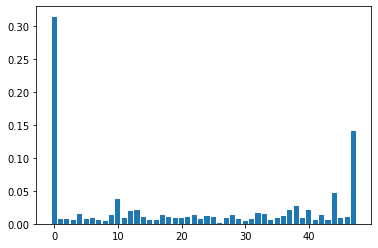

In [30]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature %s - score %.5f' % (colNames[cols[i]], v) )
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature fickett_score-full-sequence - score 0.12247
Feature G - score 0.03913
Feature T - score 0.02553
Feature AA - score 0.01253
Feature AG - score 0.01128
Feature AT - score 0.01487
Feature CG - score 0.00945
Feature GA - score 0.01136
Feature GC - score 0.01776
Feature GG - score 0.04392
Feature TA - score 0.02681
Feature TT - score 0.04439
Feature AAA - score 0.01372
Feature AAT - score 0.02986
Feature ACG - score 0.01415
Feature AGC - score 0.01008
Feature AGG - score 0.00996
Feature ATA - score 0.01541
Feature ATT - score 0.03350
Feature CAG - score 0.01526
Feature CAT - score 0.01232
Feature CGA - score 0.01033
Feature CTA - score 0.01154
Feature CTC - score 0.01203
Feature CTG - score 0.01169
Feature GAA - score 0.00968
Feature GAC - score 0.00952
Feature GAG - score 0.01014
Feature GCA - score 0.01146
Feature GCC - score 0.00938
Feature GCG - score 0.00892
Feature GCT - score 0.01801
Feature GGA - score 0.02687
Feature GGC - score 0.01112
Feature GGG - score 0.01238
Feature G

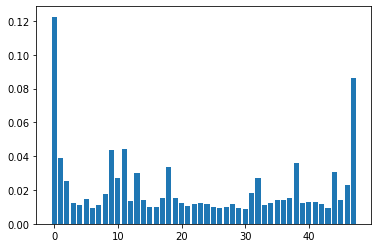

In [31]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
     print('Feature %s - score %.5f' % (colNames[cols[i]], v) )
     #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()